**APS | Parte 3: Distribuições**

Integrantes:
* Isabelle Da Silva Santos
* Livia Tanaka

In [166]:
# Bibliotecas utilizadas
import pandas as pd
import matplotlib.pyplot as plt

In [177]:
df_UE = pd.read_csv('dados_blocos\c7213e95-e23f-4682-a606-09cc46b20cbf_Data.csv')
df_OPEC = pd.read_csv('dados_blocos\ed5d4170-6c1e-41a5-83e1-a13aceb4814e_Data.csv')

filtro = ['Country Name', '2019 [YR2019]']
df_UE = df_UE[filtro]
df_OPEC = df_OPEC[filtro]


def classifica(df):
    classifica = []
    for i in range(len(df)):
        nivel = df.loc[i]['2019 [YR2019]'] 
        if nivel == '..':
            classifica.append('sem dados')
        elif float(nivel) <= 9.9:
            classifica.append('avancado')
        else:
            classifica.append('atrasado')

    df['classificacao'] = classifica
    return df

df_UE = classifica(df_UE)
df_OPEC = classifica(df_OPEC)

df_UE = df_UE[df_UE['2019 [YR2019]'] != '..'][0:25]
df_OPEC = df_OPEC[df_OPEC['2019 [YR2019]'] != '..'][0:7]




In [175]:
avancado_ue = df_UE[df_UE['classificacao'] =='avancado']
avancado_opec = df_OPEC[df_OPEC['classificacao'] =='avancado']

n_avancadoEue = len(avancado_ue)
n_avancadoEopec = len(avancado_opec)
n_avancado = n_avancadoEopec + n_avancadoEue

n_UE = len(df_UE)
n_OPEC = len(df_OPEC)
n_total = n_OPEC + n_UE

P_avancado = n_avancado / n_total


In [169]:
# P(avançado|União Europeia)

P_avancadoEue = n_avancadoEue / n_total
P_UE = n_UE / n_total

P_avancado_dado_ue = P_avancadoEue/ P_UE
print(f'Probabilidade de um país da União Europeia ser avançado: {P_avancado_dado_ue}')

# P(União Europeia|avancado) a partir do Teorema de Bayes
P_ue_dado_avancado = P_avancadoEue / P_avancado
print(f'Probabilidade de um país avançado ser da União Europeia: {P_ue_dado_avancado}')


Probabilidade de um país da União Europeia ser avançado: 0.76
Probabilidade de um país avançado ser da União Europeia: 1.0


In [170]:
# P(avançado|OPEC)
P_avancadoEopec = n_avancadoEopec / n_total
P_OPEC = n_OPEC / n_total

P_avancado_dado_opec = P_avancadoEopec/ P_OPEC
print(f'Probabilidade de um país da Organização dos Países Exportadores de Petróleo ser avançado: {P_avancado_dado_opec}')

# P(OPEC|avancado) a partir do Teorema de Bayes
P_opec_dado_avancado = P_avancadoEopec / P_avancado
print(f'Probabilidade de um país avançado ser da OPEC: {P_opec_dado_avancado}')


Probabilidade de um país da Organização dos Países Exportadores de Petróleo ser avançado: 0.0
Probabilidade de um país avançado ser da OPEC: 0.0


In [171]:
# sistema que classifica países como participantes de algum bloco à partir da informação 
# de eles serem avançados ou não em relação à taxa deinsegurança severa
def classifica_dado_avancado(classificacao):
    if classificacao == 'avancado':
        return 'União Europeia'
    else:
        return 'Organização dos Países Exportadores de Petróleo'


In [172]:
# contagem de acertos do sistema
certos = {'avancado UE': 0, 'atrasado UE': 0, 'avancado OPEC': 0, 'atrasado OPEC': 0}
indices_UE = df_UE.index.values.tolist()
indices_OPEC = df_OPEC.index.values.tolist()
for i in range(n_UE):
    a = indices_UE[i]
    classifica1 = df_UE.loc[a]['classificacao']
    if i < n_OPEC:
        b = indices_OPEC[i]
        classifica2 = df_OPEC.loc[b]['classificacao']
        if classifica_dado_avancado(classifica2) == 'Organização dos Países Exportadores de Petróleo':
            if classifica2 == 'avancado':
                certos['avancado OPEC'] += 1
            else:
                certos['atrasado OPEC'] += 1
    if classifica_dado_avancado(classifica1) == 'União Europeia':
        if classifica1 == 'avancado':
            certos['avancado UE'] += 1
        else:
            certos['atrasado UE'] += 1

n_certos = sum(certos.values())
acuracia = n_certos/n_total
print(f'Dos {n_total} países, {n_certos} obtiveram a classificação do bloco adequada, assim resultando em uma acurácia de {acuracia}.')


Dos 32 países, 26 obtiveram a classificação do bloco adequada, assim resultando em uma acurácia de 0.8125.


In [173]:
# Probabilidade de acertos na classificação (acurácia por classe) para cada um dos blocos econômicos

# União Europeia
P_acerto_av_UE = certos['avancado UE']/n_avancadoEue
P_acerto_at_UE = certos['atrasado UE']/(n_UE - n_avancadoEue)

P_acerto_UE = (certos['atrasado UE'] + certos['avancado UE'])/ n_UE
print(f'A probabilidade de acerto da classificação na União Europeia é de {P_acerto_UE}')

# P_acerto_av_OPEC = certos['avancado OPEC']/n_avancadoEopec, como seria uma divisão de 0 por 0 pode-se dizer que a probabilidade é de 100% de acerto
P_acerto_av_OPEC = 1.0
P_acerto_at_OPEC = certos['atrasado OPEC']/(n_OPEC - n_avancadoEopec)

P_acerto_OPEC = (certos['atrasado OPEC'] + certos['avancado OPEC'])/n_OPEC

print(f'A probabilidade de acerto da classificação na Organização dos Países Exportadores de Petróleo é de {P_acerto_OPEC}')



A probabilidade de acerto da classificação na União Europeia é de 0.76
A probabilidade de acerto da classificação na Organização dos Países Exportadores de Petróleo é de 1.0


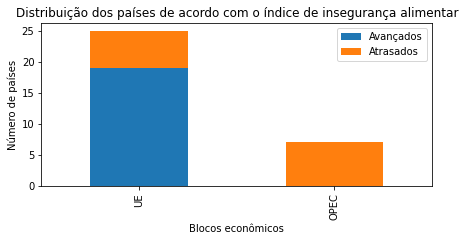

In [174]:
df = pd.DataFrame()
df['Blocos'] = ['UE', 'OPEC']
df =df.set_index('Blocos')
df['Avançados'] = [n_avancadoEue,n_avancadoEopec]
df['Atrasados'] = [n_UE - n_avancadoEue,n_OPEC -n_avancadoEopec]
df.head()


df.plot.bar(stacked=True, figsize=(7,3))
plt.ylabel('Número de países')
plt.xlabel('Blocos econômicos')
plt.title('Distribuição dos países de acordo com o índice de insegurança alimentar')
plt.xticks()
plt.show()